In [26]:
# # Dataset Information
# This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

# Content
# There are 25 variables:

# ID: ID of each client
# LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
# SEX: Gender (1=male, 2=female)
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
# MARRIAGE: Marital status (1=married, 2=single, 3=others)
# AGE: Age in years
# PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
# PAY_2: Repayment status in August, 2005 (scale same as above)
# PAY_3: Repayment status in July, 2005 (scale same as above)
# PAY_4: Repayment status in June, 2005 (scale same as above)
# PAY_5: Repayment status in May, 2005 (scale same as above)
# PAY_6: Repayment status in April, 2005 (scale same as above)
# BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
# BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
# BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
# BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
# BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
# BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
# PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
# PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
# PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
# PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
# PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
# PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
# default.payment.next.month: Default payment (1=yes, 0=no)

In [47]:
# Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
pd.set_option('max_colwidth', 400)

In [28]:
# Read the data into a Pandas DataFrame
customer_df=pd.read_csv('Resources/credit_card_demographics.csv')
customer_df.head()

,customer_id,gender,education,marital_status,age
0,1,F,university,married,24
1,2,F,university,single,26
2,3,F,university,single,34
3,4,F,university,married,37
4,5,M,university,married,57


In [29]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     30000 non-null  int64 
 1   gender          30000 non-null  object
 2   education       30000 non-null  object
 3   marital_status  29946 non-null  object
 4   age             30000 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.1+ MB


In [30]:
payments_df = pd.read_csv('Resources/credit_card_payments.csv')

In [31]:
payments_df.head()

,customer_id,credit_limit,repayment_status_sept,repayment_status_aug,repayment_status_jul,repayment_status_jun,repayment_status_may,repayment_status_april,statement_bal_aug,statement_bal_jul,...,statement_bal_may,statement_bal_April,statement_bal_march,payment_aug,payment_july,payment_june,payment_may,payment_april,payment_mar,default_payment_next_month
0,1,20000.0,2,2,-1,-1,-2,-2,3913.0,3102.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,-1,2,0,0,0,2,2682.0,1725.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,0,0,0,0,0,0,29239.0,14027.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,0,0,0,0,0,0,46990.0,48233.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,-1,0,-1,0,0,0,8617.0,5670.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [32]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 30000 non-null  int64  
 1   credit_limit                30000 non-null  float64
 2   repayment_status_sept       30000 non-null  int64  
 3   repayment_status_aug        30000 non-null  int64  
 4   repayment_status_jul        30000 non-null  int64  
 5   repayment_status_jun        30000 non-null  int64  
 6   repayment_status_may        30000 non-null  int64  
 7   repayment_status_april      30000 non-null  int64  
 8   statement_bal_aug           30000 non-null  float64
 9   statement_bal_jul           30000 non-null  float64
 10  statement_bal_june          30000 non-null  float64
 11  statement_bal_may           30000 non-null  float64
 12  statement_bal_April         30000 non-null  float64
 13  statement_bal_march         300

In [33]:
# Define a mapping of old column names to new column names
rename_columns = {
    'payment_aug': 'payment_sept',
    'payment_july': 'payment_aug',
    'payment_june': 'payment_july',
    'payment_may': 'payment_june',
    'payment_april': 'payment_may',
    'payment_mar': 'payment_april'
}

# Rename the columns in the DataFrame
payments_df.rename(columns=rename_columns, inplace=True)

# Display the first few rows to verify the renaming
payments_df.head()

,customer_id,credit_limit,repayment_status_sept,repayment_status_aug,repayment_status_jul,repayment_status_jun,repayment_status_may,repayment_status_april,statement_bal_aug,statement_bal_jul,...,statement_bal_may,statement_bal_April,statement_bal_march,payment_sept,payment_aug,payment_july,payment_june,payment_may,payment_april,default_payment_next_month
0,1,20000.0,2,2,-1,-1,-2,-2,3913.0,3102.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,-1,2,0,0,0,2,2682.0,1725.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,0,0,0,0,0,0,29239.0,14027.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,0,0,0,0,0,0,46990.0,48233.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,-1,0,-1,0,0,0,8617.0,5670.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [34]:
merged_df=pd.merge(customer_df,payments_df,on=['customer_id'])

In [35]:
merged_df.head()

,customer_id,gender,education,marital_status,age,credit_limit,repayment_status_sept,repayment_status_aug,repayment_status_jul,repayment_status_jun,...,statement_bal_may,statement_bal_April,statement_bal_march,payment_sept,payment_aug,payment_july,payment_june,payment_may,payment_april,default_payment_next_month
0,1,F,university,married,24,20000.0,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,F,university,single,26,120000.0,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,F,university,single,34,90000.0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,F,university,married,37,50000.0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,M,university,married,57,50000.0,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


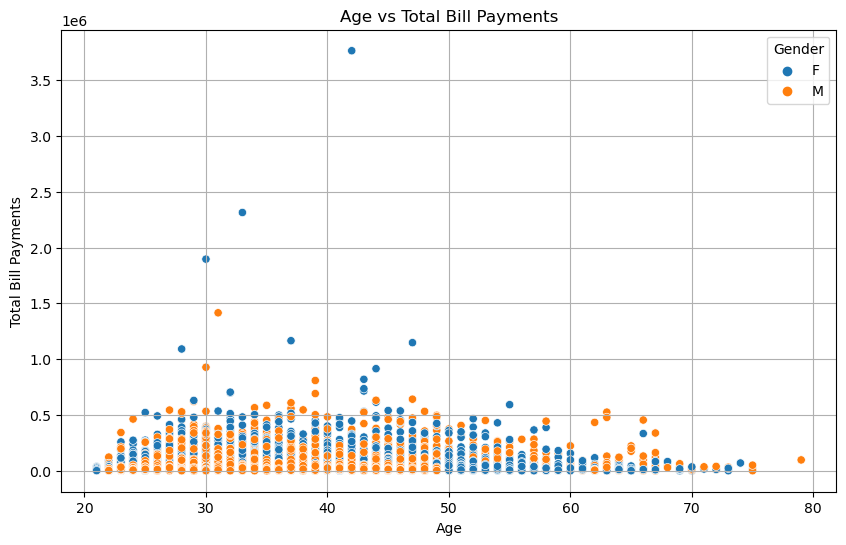

In [36]:
merged_df['total_payments'] = merged_df[['payment_sept', 'payment_aug', 'payment_july', 'payment_june', 'payment_may', 'payment_april']].sum(axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='age', y='total_payments', hue='gender')
plt.title('Age vs Total Bill Payments')
plt.xlabel('Age')
plt.ylabel('Total Bill Payments')
plt.legend(title='Gender')
plt.grid(True)
plt.show()

C:\Users\Srinika\AppData\Local\Temp\ipykernel_2748\3942105307.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_payments = merged_df.groupby(['age_group', 'gender'])['total_payments'].mean().unstack()


Average payments by age group and gender:
gender                F             M
age_group                            
18-30      26570.101241  27267.698594
31-40      35567.999528  35590.804951
41-50      35286.801346  33762.048705
51-60      27677.089524  28493.625132
60+        23170.585366  42003.409396
Correlation between age and total payments: 0.04


<Figure size 1200x600 with 0 Axes>

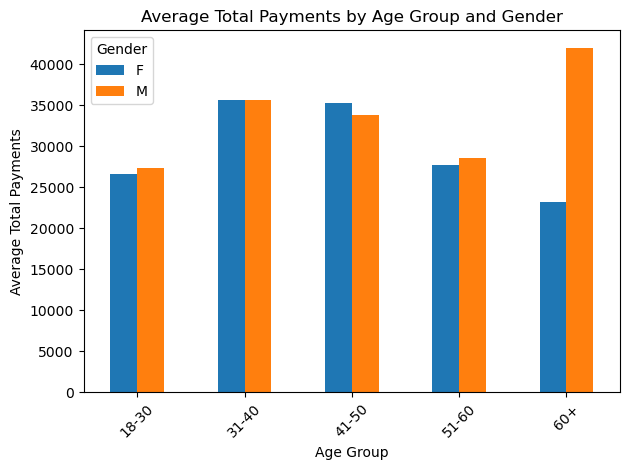

c:\Users\Srinika\anaconda3\envs\dev\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


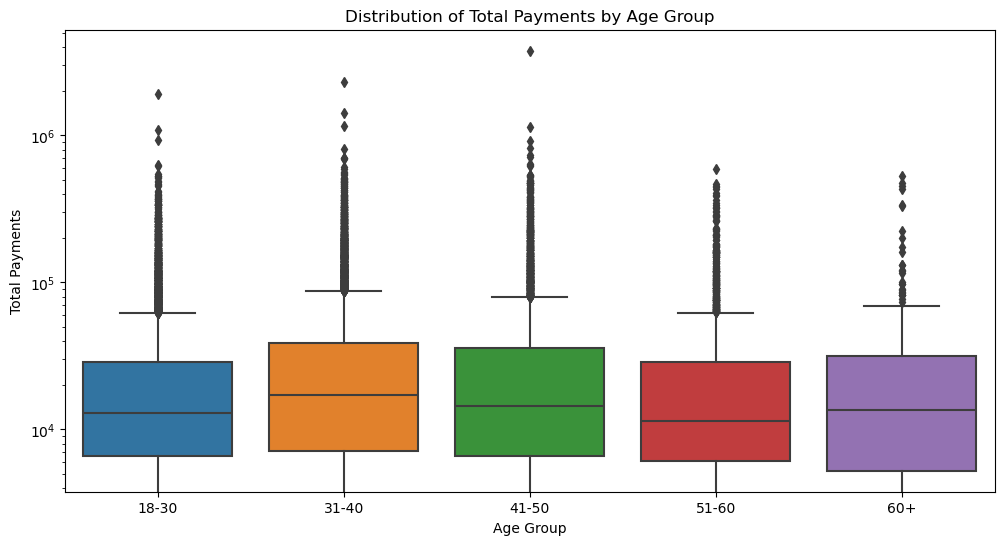

In [37]:
# Calculate total payments
merged_df['total_payments'] = merged_df[['payment_sept', 'payment_aug', 'payment_july', 'payment_june', 'payment_may', 'payment_april']].sum(axis=1)

# Age groups
merged_df['age_group'] = pd.cut(merged_df['age'], bins=[0, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '60+'])

# Average payments by age group and gender
avg_payments = merged_df.groupby(['age_group', 'gender'])['total_payments'].mean().unstack()
print("Average payments by age group and gender:")
print(avg_payments)

# Correlation between age and total payments
correlation = merged_df['age'].corr(merged_df['total_payments'])
print(f"\
Correlation between age and total payments: {correlation:.2f}")

# Visualize average payments by age group and gender
plt.figure(figsize=(12, 6))
avg_payments.plot(kind='bar')
plt.title('Average Total Payments by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Total Payments')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot of total payments by age group

plt.figure(figsize=(12, 6))
sns.boxplot(x='age_group', y='total_payments', data=merged_df)
plt.title('Distribution of Total Payments by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Payments')
plt.yscale('log')  # Using log scale for better visualization
plt.show()

These insights suggest that while there are some differences in payment behavior across age groups and genders, the overall correlation between age and total payments is weak. 

The plot shows that the total payments distribution is fairly consistent across different age groups, with most people having similar payment amounts. However, in every age group, there are some individuals who have made much larger payments, as indicated by the presence of numerous outliers.

Correlation matrix:
                         credit_limit  total_statement_balance  total_payments
credit_limit                 1.000000                 0.302044        0.352655
total_statement_balance      0.302044                 1.000000        0.343906
total_payments               0.352655                 0.343906        1.000000


c:\Users\Srinika\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Srinika\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Srinika\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


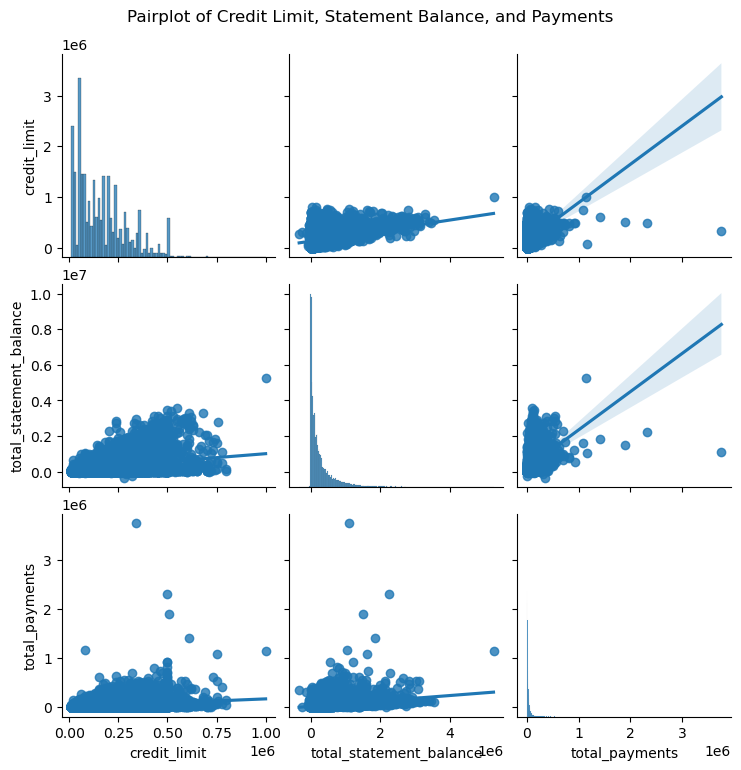

In [38]:
# Analyze the relationship between credit limit, statement balance, and payments

# Calculate total statement balance
merged_df['total_statement_balance'] = merged_df[['statement_bal_aug', 'statement_bal_jul', 'statement_bal_june', 'statement_bal_may', 'statement_bal_April', 'statement_bal_march']].sum(axis=1)

# Correlation between credit limit, total statement balance, and total payments
correlation_matrix = merged_df[['credit_limit', 'total_statement_balance', 'total_payments']].corr()
print("Correlation matrix:")
print(correlation_matrix)

# Visualize the relationship using pairplot
sns.pairplot(merged_df, vars=['credit_limit', 'total_statement_balance', 'total_payments'], kind='reg')
plt.suptitle('Pairplot of Credit Limit, Statement Balance, and Payments', y=1.02)
plt.show()

Summary:
Correlation Matrix:
There is a moderate positive correlation between credit limit and total payments (0.35).
The correlation between credit limit and total statement balance is also moderate (0.30).
Total statement balance and total payments have a moderate correlation (0.34).
These correlations suggest that as the credit limit increases, both the total statement balance and total payments tend to increase as well. However, the relationships are not very strong, indicating other factors may also be influencing these variables.

In [39]:

# Define a function to calculate spending for each month
def calculate_spending(df):
    df['spending_aug'] = df['statement_bal_aug'] - df['statement_bal_jul'] + df['payment_sept']
    df['spending_july'] = df['statement_bal_jul'] - df['statement_bal_june'] + df['payment_aug']
    df['spending_june'] = df['statement_bal_june'] - df['statement_bal_may'] + df['payment_july']
    df['spending_may'] = df['statement_bal_may'] - df['statement_bal_April'] + df['payment_june']
    df['spending_april'] = df['statement_bal_April'] - df['statement_bal_march'] + df['payment_may']
    
    return df

In [40]:
calculate_spending(merged_df)

,customer_id,gender,education,marital_status,age,credit_limit,repayment_status_sept,repayment_status_aug,repayment_status_jul,repayment_status_jun,...,payment_april,default_payment_next_month,total_payments,age_group,total_statement_balance,spending_aug,spending_july,spending_june,spending_may,spending_april
0,1,F,university,married,24,20000.0,2,2,-1,-1,...,0.0,1,689.0,18-30,7704.0,811.0,3102.0,689.0,0.0,0.0
1,2,F,university,single,26,120000.0,-1,2,0,0,...,2000.0,1,5000.0,18-30,17077.0,957.0,43.0,410.0,817.0,194.0
2,3,F,university,single,34,90000.0,0,0,0,0,...,5000.0,0,11018.0,31-40,101653.0,16730.0,1968.0,228.0,383.0,399.0
3,4,F,university,married,37,50000.0,0,0,0,0,...,1000.0,0,8388.0,31-40,231334.0,757.0,961.0,22177.0,455.0,481.0
4,5,M,university,married,57,50000.0,-1,0,-1,0,...,679.0,0,59049.0,51-60,109339.0,4947.0,6516.0,24895.0,10794.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,M,high school,married,39,220000.0,0,0,0,0,...,1000.0,0,42550.0,31-40,725349.0,4633.0,4450.0,125364.0,59814.0,20257.0
29996,29997,M,high school,single,43,150000.0,-1,-1,-1,-1,...,0.0,0,14490.0,41-50,21182.0,1692.0,1852.0,3521.0,3918.0,5190.0
29997,29998,M,university,single,37,30000.0,4,3,2,-1,...,3100.0,1,31300.0,31-40,70496.0,209.0,598.0,3880.0,4496.0,3225.0
29998,29999,M,high school,married,41,80000.0,1,-1,0,0,...,1804.0,1,147181.0,41-50,266611.0,5876.0,5484.0,24708.0,42845.0,15875.0


In [41]:
merged_df['Total_spend']=merged_df[['spending_aug','spending_july','spending_june','spending_may','spending_april']].sum(axis=1)
merged_df.head()

,customer_id,gender,education,marital_status,age,credit_limit,repayment_status_sept,repayment_status_aug,repayment_status_jul,repayment_status_jun,...,default_payment_next_month,total_payments,age_group,total_statement_balance,spending_aug,spending_july,spending_june,spending_may,spending_april,Total_spend
0,1,F,university,married,24,20000.0,2,2,-1,-1,...,1,689.0,18-30,7704.0,811.0,3102.0,689.0,0.0,0.0,4602.0
1,2,F,university,single,26,120000.0,-1,2,0,0,...,1,5000.0,18-30,17077.0,957.0,43.0,410.0,817.0,194.0,2421.0
2,3,F,university,single,34,90000.0,0,0,0,0,...,0,11018.0,31-40,101653.0,16730.0,1968.0,228.0,383.0,399.0,19708.0
3,4,F,university,married,37,50000.0,0,0,0,0,...,0,8388.0,31-40,231334.0,757.0,961.0,22177.0,455.0,481.0,24831.0
4,5,M,university,married,57,50000.0,-1,0,-1,0,...,0,59049.0,51-60,109339.0,4947.0,6516.0,24895.0,10794.0,704.0,47856.0


These are for machine learning:
Here are five business problems that could be explored using the credit card payment dataset:

1. Predicting Credit Card Default Risk
Business Problem: Identify customers who are at risk of defaulting on their credit card payments in the next month.
How the Dataset Helps: By analyzing historical payment behavior (e.g., repayment status, payment amounts, statement balances), a predictive model can be developed to assess the likelihood of default. This could help financial institutions take proactive measures to reduce credit losses.
2. Customer Segmentation Based on Payment Behavior
Business Problem: Segment customers based on their spending and payment patterns to tailor marketing strategies and credit offerings.
How the Dataset Helps: By clustering customers based on their monthly spending, payments, and repayment status, businesses can create segments (e.g., regular payers, high spenders, delinquent payers) and offer personalized products, such as increased credit limits, rewards, or reminders for payments.
3. Optimizing Credit Limits
Business Problem: Determine optimal credit limits for customers to balance risk and profitability.
How the Dataset Helps: By analyzing a customer’s spending habits, payments, and existing credit limits, banks can adjust credit limits to better suit individual risk profiles. This would maximize usage while minimizing the chances of defaults.
4. Identifying High-Value Customers for Loyalty Programs
Business Problem: Identify customers who bring the most value to the company and design loyalty or rewards programs to retain them.
How the Dataset Helps: By analyzing spending patterns and payment behaviors over time, businesses can identify high-value customers who consistently spend and pay off their balances. These customers could be rewarded with loyalty programs to enhance retention and long-term value.
5. Reducing Late Payments through Targeted Interventions
Business Problem: Reduce the number of late or missed payments by implementing targeted interventions.
How the Dataset Helps: By examining the repayment status and payment history, businesses can identify customers who are likely to miss payments and proactively send them reminders or offer flexible payment plans. This could reduce delinquency rates and improve cash flow for the company.
Each of these business problems could drive actionable insights that contribute to improving customer relationships, reducing risk, and maximizing profitability.

1. Business Problem: High Rate of Credit Card Defaults
Analysis: High levels of missed payments or defaults can lead to financial losses for the company.
Recommendation: Perform a detailed analysis of customers with frequent late payments or defaults. Identify patterns such as overextended credit limits, consistently high balances, or sudden drops in payment amounts. Based on this analysis, recommend stricter credit limits for high-risk customers and provide flexible repayment plans to customers who miss payments occasionally but have a strong payment history.
2. Business Problem: Inefficient Credit Utilization
Analysis: Some customers might not be using their available credit efficiently, either underutilizing or maxing out their credit limits.
Recommendation: Segment customers based on their credit utilization (e.g., customers using less than 30% of their credit vs. those using over 80%). For underutilizers, consider offering incentives like rewards or promotional interest rates to encourage spending. For over-utilizers, advise a review of credit limits and implement programs that promote paying down balances to reduce the risk of default.
3. Business Problem: Poor Retention of High-Value Customers
Analysis: High-value customers (those who spend and pay regularly) may not be receiving enough attention, leading to attrition or reduced spending.
Recommendation: Conduct an analysis to identify high-value customers based on their spending and payment behavior. Provide personalized offers such as enhanced rewards, loyalty bonuses, or higher credit limits to retain these customers and incentivize continued spending. Additionally, set up alert systems for significant drops in spending so the company can intervene proactively.
4. Business Problem: Underperformance of Loyalty Programs
Analysis: Current loyalty or rewards programs may not be effectively motivating customers to spend more or make timely payments.
Recommendation: Analyze the spending habits of customers enrolled in loyalty programs vs. those who are not. If there is little difference in behavior, the loyalty programs may need to be restructured. Consider offering tiered rewards that increase as customers spend or pay more promptly. Also, design promotional campaigns targeting customers who are on the verge of reaching higher reward levels to encourage additional spending.
5. Business Problem: Lack of Insights into Seasonal Spending Patterns
Analysis: There may be seasonal trends in spending or payment behaviors that the company is not leveraging effectively.
Recommendation: Perform a time-series analysis of spending and payments to identify seasonal trends (e.g., increased spending during holidays or reduced payments in certain months). Use these insights to better plan marketing campaigns, adjust credit limits, or introduce temporary promotional offers. For example, if spending spikes in December but payment issues increase in January, consider offering balance transfer promotions or interest-free periods to ease post-holiday financial burdens.


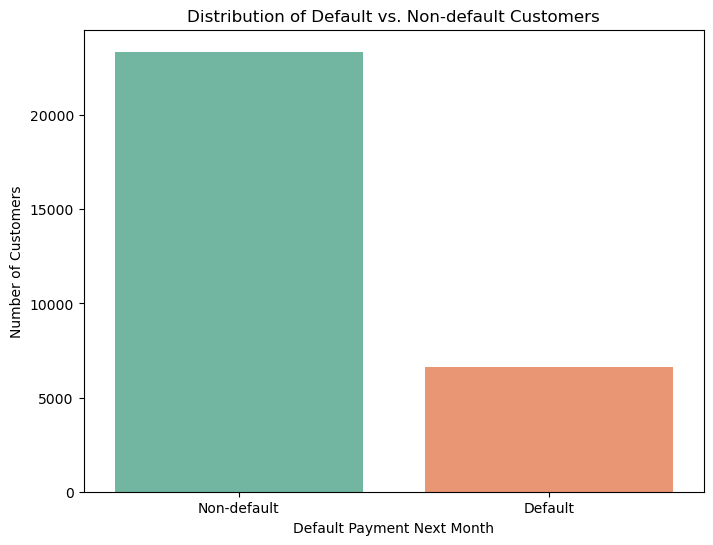

In [42]:
def plot_default_distribution(df):
    plt.figure(figsize=(8, 6))
    sns.countplot(x='default_payment_next_month', data=df, palette='Set2')
    plt.title('Distribution of Default vs. Non-default Customers')
    plt.xlabel('Default Payment Next Month')
    plt.ylabel('Number of Customers')
    plt.xticks(ticks=[0, 1], labels=['Non-default', 'Default'])
    plt.show()

plot_default_distribution(merged_df)

C:\Users\Srinika\AppData\Local\Temp\ipykernel_2748\1583650559.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='customer_value_segment', y='Total_spend', data=df, ci=None, palette='coolwarm')


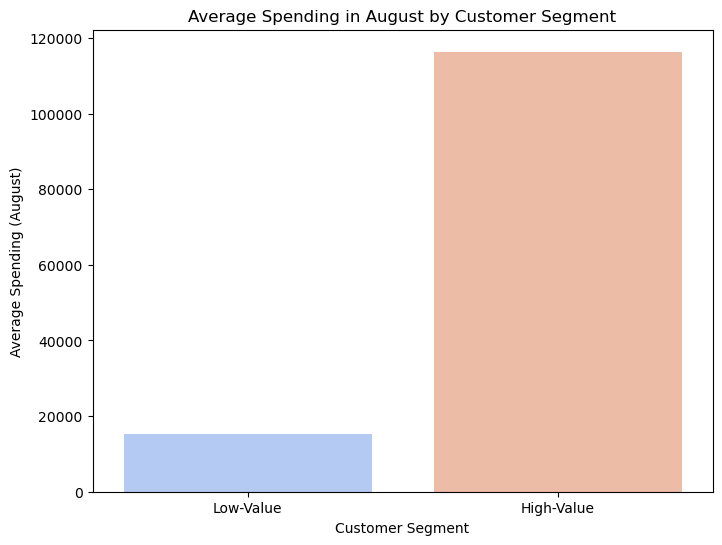

In [43]:
def plot_spending_by_value_segment(df):
    # Classify high-value customers as those spending above a certain threshold
    high_value_threshold = 50000  # Example threshold
    df['customer_value_segment'] = df['Total_spend'].apply(lambda x: 'High-Value' if x > high_value_threshold else 'Low-Value')
    
    plt.figure(figsize=(8, 6))
    sns.barplot(x='customer_value_segment', y='Total_spend', data=df, ci=None, palette='coolwarm')
    plt.title('Average Spending in August by Customer Segment')
    plt.xlabel('Customer Segment')
    plt.ylabel('Average Spending (August)')
    plt.show()
plot_spending_by_value_segment(merged_df)

c:\Users\Srinika\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Srinika\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Srinika\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Srinika\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1

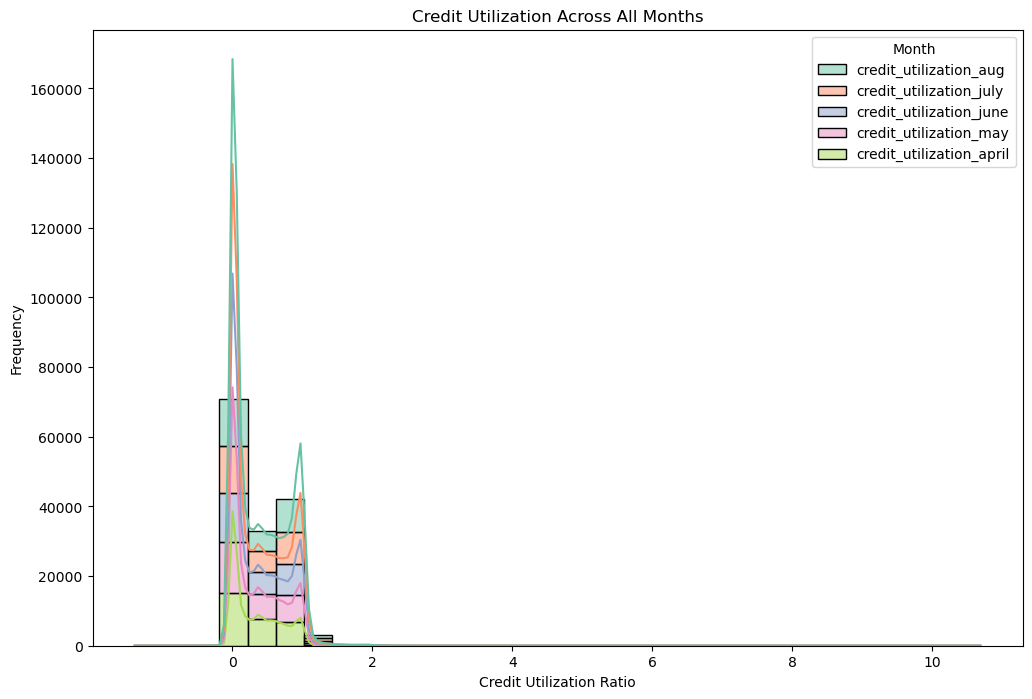

In [44]:
def plot_credit_utilization_all_months(df):
    # Calculate credit utilization for each month
    df['credit_utilization_aug'] = df['statement_bal_aug'] / df['credit_limit']
    df['credit_utilization_july'] = df['statement_bal_jul'] / df['credit_limit']
    df['credit_utilization_june'] = df['statement_bal_june'] / df['credit_limit']
    df['credit_utilization_may'] = df['statement_bal_may'] / df['credit_limit']
    df['credit_utilization_april'] = df['statement_bal_April'] / df['credit_limit']

    # Combine all the credit utilization columns into a single DataFrame for plotting
    utilization_df = pd.melt(df[['credit_utilization_aug', 'credit_utilization_july', 
                                 'credit_utilization_june', 'credit_utilization_may', 
                                 'credit_utilization_april']],
                             var_name='Month', value_name='Credit Utilization')
    
    # Plot a histogram for all months together
    plt.figure(figsize=(12, 8))
    sns.histplot(data=utilization_df, x='Credit Utilization', hue='Month', 
                 bins=30, kde=True, palette='Set2', multiple='stack')
    
    plt.title('Credit Utilization Across All Months')
    plt.xlabel('Credit Utilization Ratio')
    plt.ylabel('Frequency')
    plt.show()


plot_credit_utilization_all_months(merged_df)

In [48]:
# Prepare the credit utilization data
utilization_data = merged_df[['credit_utilization_aug', 'credit_utilization_july', 
                       'credit_utilization_june', 'credit_utilization_may', 
                       'credit_utilization_april']]

# Convert to JSON format
utilization_dict = utilization_data.to_dict(orient='records')

# Pretty-print the JSON and save to a file
with open('credit_utilization_pretty.json', 'w') as f:
    json.dump(utilization_dict, f, indent=4)

print("Pretty-printed data saved to credit_utilization_pretty.json")

Pretty-printed data saved to credit_utilization_pretty.json


Analysis of the Credit Utilization Histogram Across All Months:
Distribution Concentration:

The distribution of credit utilization is heavily concentrated around the lower end, particularly around a utilization ratio of 0 to 0.5. This indicates that the majority of customers are using less than 50% of their available credit across all months.
Minor Variation Across Months:

The distributions for each month are quite similar, showing that there is little variance in credit utilization month-over-month. Most months show a similar peak around the same utilization range, suggesting that overall credit usage behavior is consistent throughout the months.
Multiple Peaks:

There are smaller peaks around the 1.0 utilization ratio, indicating that some customers are maxing out their credit limits. These customers might be at a higher risk of default if their balances remain high relative to their credit limits.
Long Tail:

The distribution has a long right tail, showing that while most customers have low credit utilization, there are some customers with very high credit utilization (greater than 1.0, meaning they are over their credit limits). This small group of customers represents a potential risk segment, as high credit utilization is often linked to financial strain.
Business Insight:

Recommendation: Since most customers maintain a low credit utilization, the bank might consider offering targeted promotions to encourage greater spending for those with a utilization ratio under 30%. However, for the customers with very high utilization, financial coaching, credit counseling, or repayment assistance programs could be offered to mitigate the risk of default.
This analysis helps identify the spending behaviors of different customer segments and offers actionable insights for both risk management and marketing opportunities.

In [19]:

pd.set_option('max_colwidth', 400)
merged_df.head()

,customer_id,gender,education,marital_status,age,credit_limit,repayment_status_sept,repayment_status_aug,repayment_status_jul,repayment_status_jun,...,total_payments,age_group,total_statement_balance,spending_aug,spending_july,spending_june,spending_may,spending_april,Total_spend,customer_value_segment
0,1,F,university,married,24,20000.0,2,2,-1,-1,...,689.0,18-30,7704.0,811.0,3102.0,689.0,0.0,0.0,4602.0,Low-Value
1,2,F,university,single,26,120000.0,-1,2,0,0,...,5000.0,18-30,17077.0,957.0,43.0,410.0,817.0,194.0,2421.0,Low-Value
2,3,F,university,single,34,90000.0,0,0,0,0,...,11018.0,31-40,101653.0,16730.0,1968.0,228.0,383.0,399.0,19708.0,Low-Value
3,4,F,university,married,37,50000.0,0,0,0,0,...,8388.0,31-40,231334.0,757.0,961.0,22177.0,455.0,481.0,24831.0,Low-Value
4,5,M,university,married,57,50000.0,-1,0,-1,0,...,59049.0,51-60,109339.0,4947.0,6516.0,24895.0,10794.0,704.0,47856.0,Low-Value


c:\Users\Srinika\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Srinika\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


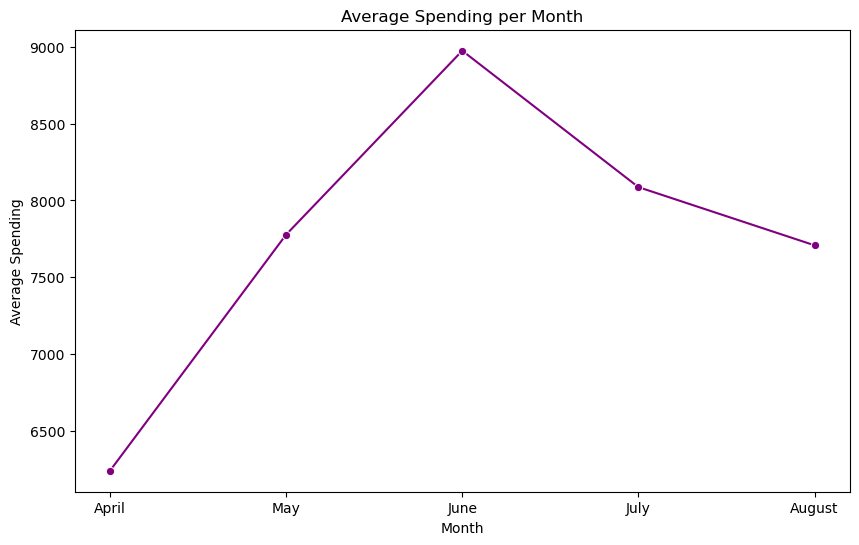

In [ ]:
def plot_seasonal_spending(df):
    # Assuming spending columns for different months
    spending_columns = ['spending_april', 'spending_may', 'spending_june', 'spending_july', 'spending_aug']
    
    # Calculate average spending per month
    monthly_spending = df[spending_columns].mean().reset_index()
    monthly_spending.columns = ['Month', 'Average Spending']
    
    # Rename the months for clarity
    monthly_spending['Month'] = ['April', 'May', 'June', 'July', 'August']
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Month', y='Average Spending', data=monthly_spending, marker='o', color='purple')
    plt.title('Average Spending per Month')
    plt.xlabel('Month')
    plt.ylabel('Average Spending')
    plt.show()


plot_seasonal_spending(merged_df)